# Exercises for Chapter 3

----------

*Most exercises below are adapted from [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/).*

## Support Vector Machines

The following questions test your ability to implement SVM classifiers and reason about their effectiveness.

(a) Generate a simulated two-class data set with 100 observations and two features in which there is a visible but nonlinear separation between the two classes.

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


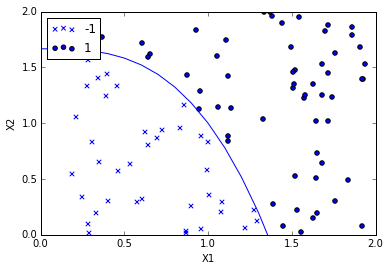

In [2]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


# Generate observations on the interval [0, 1) 
x1 = np.random.uniform(low=0.0, high=2.0, size=100)
x2 = np.random.uniform(low=0.0, high=2.0, size=100)
X = np.matrix([x1, x2]).T

# Assign class labels based on the decision surface 2x1^3 + 3x2 = 5
y = np.where(((2 * (x1 ** 3)) + (3 * x2) >= 5), 1, -1)

# Plot the decision boundary
dec_x = np.arange(0, 2, 0.1)
dec_y = (5 - (2 *(dec_x ** 3))) / 3
plt.plot(dec_x, dec_y)

# Plot the samples
markers = ('x', 'o')
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(X[y == cl, 0], X[y == cl, 1],
                marker=markers[idx], label=cl)

plt.xlim(0.0, 2.0)
plt.xlabel('X1')
plt.ylim(0.0, 2.0)
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()
plt.close()

(b) Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data.

In [3]:
from sklearn import svm

# Instantiate the three classifiers
linear = svm.SVC(kernel='linear')
radial = svm.SVC(kernel='rbf')
poly_2 = svm.SVC(kernel='poly', degree=2)
poly_3 = svm.SVC(kernel='poly', degree=3)
classifiers = [linear, radial, poly_2, poly_3]
names = ['linear', 'radial', 'degree 2 polynomial', 'degree 3 polynomial']

# Fit classifiers to the training data and calculate accuracy
for name, classifier in zip(names, classifiers):
    classifier.fit(X, y)
    score = classifier.score(X, y)
    print('''The {name} classifier has a mean accuracy of {score} \
on the training data.'''.format(name=name, score=str(int(score*100)) + '%'))

print()
print('''Hence, the polynomial and radial kernels out-perform the linear classifier.''')

The linear classifier has a mean accuracy of 93% on the training data.
The radial classifier has a mean accuracy of 97% on the training data.
The degree 2 polynomial classifier has a mean accuracy of 99% on the training data.
The degree 3 polynomial classifier has a mean accuracy of 99% on the training data.

Hence, the polynomial and radial kernels out-perform the linear classifier.


(c) Generate 1000 test observations through the same method that you used in (a).

In [4]:
# Generate observations on the interval [0, 1) 
x1_test = np.random.uniform(low=0.0, high=2.0, size=1000)
x2_test = np.random.uniform(low=0.0, high=2.0, size=1000)
X_test = np.matrix([x1_test, x2_test]).T

# Assign class labels based on the decision surface 2x1^3 + 3x2 = 5
y_test = np.where(((2 * (x1_test ** 3)) + (3 * x2_test) >= 5), 1, -1)

(d) Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


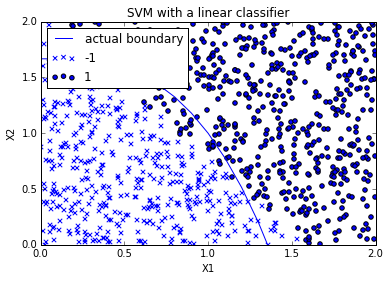

Training error for the linear classifier: 7.0%
Testing error for the linear classifier: 6.0%


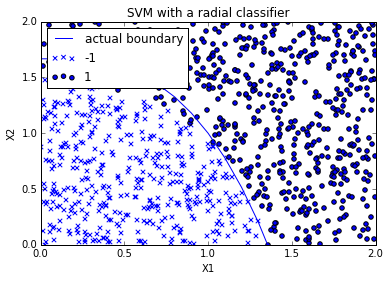

Training error for the radial classifier: 3.0%
Testing error for the radial classifier: 4.9%


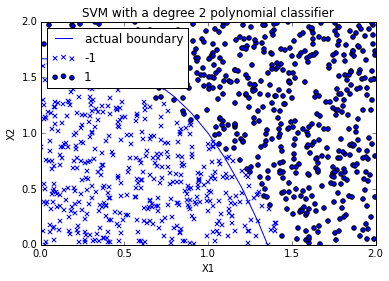

Training error for the degree 2 polynomial classifier: 1.0%
Testing error for the degree 2 polynomial classifier: 5.2%


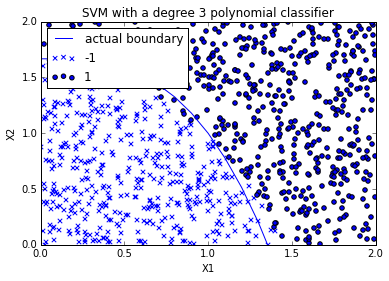

Training error for the degree 3 polynomial classifier: 1.0%
Testing error for the degree 3 polynomial classifier: 3.8%


In [5]:
for name, classifier in zip(names, classifiers):
    # Predict training and test data
    pred_train = classifier.predict(X)
    pred_test = classifier.predict(X_test)
    
    # Calculate error rates for training and test data
    err_train = np.sum(np.where(pred_train != y, 1, 0)) / len(pred_train)
    err_test = np.sum(np.where(pred_test != y_test, 1, 0)) / len(pred_test)

    # Plot results
    plt.plot(dec_x, dec_y, label='actual boundary')
    markers = ('x', 'o')
    for idx, cl in enumerate(np.unique(y_test)):
        plt.scatter(X_test[pred_test == cl, 0], X_test[pred_test == cl, 1],
                    marker=markers[idx], label=cl)

    plt.xlim(0.0, 2.0)
    plt.xlabel('X1')
    plt.ylim(0.0, 2.0)
    plt.ylabel('X2')
    plt.legend(loc='upper left')
    plt.title('SVM with a {name} classifier'.format(name=name))
    plt.show()
    plt.close()
    
    # Print results
    print('''Training error for the {name} classifier: {err}'''.format(
            name=name, err=str(err_train*100) + '%'))
    print('''Testing error for the {name} classifier: {err}'''.format(
            name=name, err=str(err_test*100) + '%'))
    
    

As we can see in the error reports and plots above, the radial and polynomial classifiers perform equally well on the test data within 0.5% error. The polynomial classifier with degree 3 performs the best in most iterations of this experiment, as we would expect given the actual underlying decision boundary.

--------------

## Logistic regression

We have seen that we can fit an SVM with a nonlinear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

(a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them.

In [25]:
# Generate random training data
x1 = np.random.uniform(low=0.0, high=10.0, size=500)
x2 = np.random.uniform(low=0.0, high=10.0, size=500)
X = np.matrix([x1, x2]).T
y = np.where(0.15 * (x1 ** 2) - x2 > 0, 1, 0)

(b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the y-axis.

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


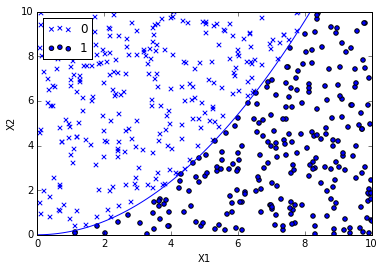

In [81]:
import math

# Plot the decision boundary
dec_x = np.arange(0, 10, 0.1)
dec_y = 0.15 * (dec_x ** 2)
plt.plot(dec_x, dec_y)

# Plot the samples
markers = ('x', 'o')
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(X[y == cl, 0], X[y == cl, 1],
                marker=markers[idx], label=cl)
    
plt.xlim(0.0, 10.0)
plt.xlabel('X1')
plt.ylim(0.0, 10.0)
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()
plt.close()

(c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [27]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


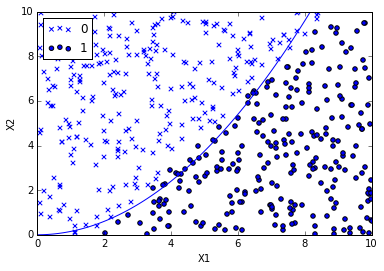

In [32]:
y_pred = logistic.predict(X)

# Plot the decision boundary
dec_x = np.arange(0, 10, 0.1)
dec_y = 0.15 * (dec_x ** 2)
plt.plot(dec_x, dec_y)

# Plot the samples
markers = ('x', 'o')
for idx, cl in enumerate(np.unique(y_pred)):
    plt.scatter(X[y_pred == cl, 0], X[y_pred == cl, 1],
                marker=markers[idx], label=cl)
    
plt.xlim(0.0, 10.0)
plt.xlabel('X1')
plt.ylim(0.0, 10.0)
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()
plt.close()

(e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. X12, X1 ×X2, log(X2), and so forth).

In [93]:
logistic_sqd = LogisticRegression()
X_sqd = np.matrix([0.15 * (x1**2), x2]).T

logistic_sqd.fit(X_sqd, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

(f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


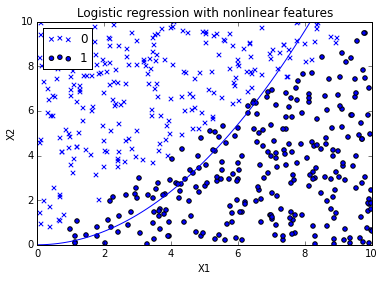

In [94]:
y_pred = logistic_sqd.predict(X)
plt.plot(dec_x, dec_y)
for idx, cl in enumerate(np.unique(y_pred)):
    plt.scatter(X[y_pred == cl, 0], X[y_pred == cl, 1],
                marker=markers[idx], label=cl)

plt.xlim(0.0, 10.0)
plt.xlabel('X1')
plt.ylim(0.0, 10.0)
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.title('Logistic regression with nonlinear features')
plt.show()
plt.close()

(g) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


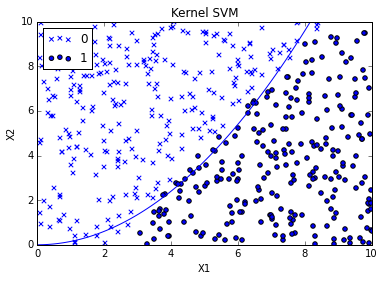

In [86]:
svc = svm.SVC(kernel='linear')
svc.fit(X, y)

y_pred = svc.predict(X)
plt.plot(dec_x, dec_y)
for idx, cl in enumerate(np.unique(y_pred)):
    plt.scatter(X[y_pred == cl, 0], X[y_pred == cl, 1],
                marker=markers[idx], label=cl)

plt.xlim(0.0, 10.0)
plt.xlabel('X1')
plt.ylim(0.0, 10.0)
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.title('Kernel SVM')
plt.show()
plt.close()

(h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


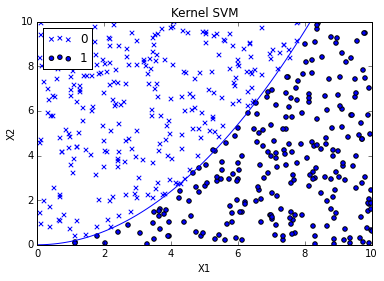

In [88]:
svc = svm.SVC(kernel='rbf')
svc.fit(X, y)

y_pred = svc.predict(X)
plt.plot(dec_x, dec_y)
for idx, cl in enumerate(np.unique(y_pred)):
    plt.scatter(X[y_pred == cl, 0], X[y_pred == cl, 1],
                marker=markers[idx], label=cl)

plt.xlim(0.0, 10.0)
plt.xlabel('X1')
plt.ylim(0.0, 10.0)
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.title('Kernel SVM')
plt.show()
plt.close()

(i) Comment on your results.

--------

Prove algebraically that the logistic and logit representations of the logistic regression model are equivalent. More specifically, prove that:

$$ p(X) = \frac{1}{1 + e^{-z}} \quad \Leftrightarrow \quad log(\frac{p(X)}{1-p(X)}) = z $$

--------

Comprehension questions about **odds**:

(a) On average, what fraction of people with an odds of 0.37 of
defaulting on their credit card payment will in fact default?

(b) Suppose that an individual has a 16% chance of defaulting on their credit card payment. What are the odds that they will default?

--------

Suppose we collect data for a group of students in a statistics class with variables $x_{1}$ = hours studied, $x_{2}$ = undergrad GPA, and $y$ = receive an A. We fit a logistic regression and produce estimated coefficients $w_{0} = −6$, $w_{1} = 0.05$, and $w_{2} = 1$.

(a) Estimate the probability that a student who studies for 40 hours and has an undergrad GPA of 3.5 gets an A in the class.

(b) How many hours would the student in part (a) need to study to have a 50% chance of getting an A in the class?

------------------

## K-Nearest Neighbors

An exercise to help investigate the curse of dimensionality in nearest-neighbor algorithms:

(a) Suppose that we have a set of observations, each with measurements on $p = 1$ feature, $X$. We assume that $X$ is uniformly distributed on $[0,1]$. Each observation $X^{(i)}$ is associated with a response value $y^{(i)}$. Suppose that we wish to predict a test observation’s response using only observations that are within 10% of the range of $X$ closest to that test observation. For instance, in order to predict the response for a test observation with $X = 0.6$, we will use observations in the range $[0.55, 0.65]$. On average, what fraction of the available observations will we use to make the prediction?

(b) Now suppose that we have a set of observations, each with measurements on $p = 2$ features, $X_{1}$ and $X_{2}$. We assume that ($X_{1}$, $X_{2}$) are uniformly distributed on $[0,1] × [0,1]$. We wish to predict a test observation’s response using only observations that are within 10% of the range of $X_{1}$ and within 10% of the range of $X_{2}$ closest to that test observation. For instance, in order to predict the response for a test observation with $X_{1} = 0.6$ and $X_{2} = 0.35$, we will use observations in the range $[0.55, 0.65]$ for $X_{1}$ and in the range $[0.3, 0.4]$ for $X_{2}$. On average, what fraction of the available observations will we use to make the prediction?

(c) Now suppose that we have a set of observations on $p = 100$ features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation’s response using observations within the 10% of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?

(d) Using your answers to parts (a)–(c), argue that a drawback of KNN when $p$ is large is that there are very few training observations “near” any given test observation.

(e) Now suppose that we wish to make a prediction for a test observation by creating a $p$-dimensional hypercube centered around the test observation that contains, on average, 10% of the training observations. For $p = 1$, $p = 2$, and $p = 100$, what is the length of each side of the hypercube? Comment on your answer.

*Note: A hypercube is a generalization of a cube to an arbitrary number of dimensions. When $p = 1$, a hypercube is simply a line segment; when $p = 2$ it is a square; and when $p = 100$ it is a 100-dimensional cube.*

-------

## Decision trees

Consider the Gini index, classification error, and entropy measures of impurity in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $p(i \mid t)$. The x- axis should display $p(i \mid t)$, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classification error, and entropy.

--------

This problem involves the OJ data set which is part of the ISLR package.

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

(b) Fit a decision tree to the training data, with `Purchase` as the response and all other variables except for `Buy` as predictors. Produce summary statistics about the tree and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?

(c) Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.

(d) Create a plot of the tree, and interpret the results.

(e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

(f) Apply a cross-validation function to the training set in order to determine the optimal tree size.

(g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

(h) Which tree size corresponds to the lowest cross-validated classification error rate?

(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

(j) Compare the training error rates between the pruned and un-pruned trees. Which is higher?

(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?